# In case, the file import data from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install libraries
!pip install mne
!pip install PyWavelets
# !pip install pyriemann

## Reference paper
- Paper "Comparative Study of Wavelet-Based Unsupervised Ocular Artifact Removal Techniques for Single-Channel EEG Data"

## Reference for the data
- https://data.mendeley.com/datasets/wb6yvr725d/4

    - EEG electrodes (Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, T6, Fz, Cz, Pz) were placed according to the 10–20 International System,
    - Sampling frequency = 200 Hz
    - Bandpass filter at 0.5-40Hz
    - Notch filter at 50 Hz
    - Each dataset has 30 seconds duration
    - OAs occur due to eye moment and eye-blinks and have freuqncy ranges of 0-7 Hz and 8-13 Hz

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.io
import scipy.signal
import seaborn as sns; sns.set_style("darkgrid") # styling
import pywt

def createSubplot(n):
    fig,axs = plt.subplots(n,figsize=(15,8))
    fig.tight_layout(pad=3.0)
    return fig,axs

number_subjects = 54
initial_fs = 200
EEG_electrodes = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 
                  'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']


list_denoised_EEG_keys = ['sim1_con', 'sim2_con', 'sim3_con', 'sim4_con', 'sim5_con', 
                          'sim6_con', 'sim7_con', 'sim8_con', 'sim9_con', 'sim10_con', 
                          'sim11_con', 'sim12_con', 'sim13_con', 'sim14_con', 'sim15_con', 
                          'sim16_con', 'sim17_con', 'sim18_con', 'sim19_con', 'sim20_con', 
                          'sim21_con', 'sim22_con', 'sim23_con', 'sim24_con', 'sim25_con', 
                          'sim26_con', 'sim27_con', 'sim28_con', 'sim29_con', 'sim30_con', 
                          'sim31_con', 'sim32_con', 'sim33_con', 'sim34_con', 'sim35_con', 
                          'sim36_con', 'sim37_con', 'sim38_con', 'sim39_con', 'sim40_con', 
                          'sim41_con', 'sim42_con', 'sim43_con', 'sim44_con', 'sim45_con', 
                          'sim46_con', 'sim47_con', 'sim48_con', 'sim49_con', 'sim50_con', 
                          'sim51_con', 'sim52_con', 'sim53_con', 'sim54_con']

In [ ]:
ar_techniques = ['WT', 'ICA', 'wICA', 'WNN', 'SRGAN']
np_data = []

for e_technique in ar_techniques:
    loaded_pure_EEG = np.load(f'Result/before_after_removal/{e_technique}_pure_EEG.npy')
    loaded_cont_EEG = np.load(f'Result/before_after_removal/{e_technique}_cont_EEG.npy')
    loaded_denoised_EEG = np.load(f'Result/before_after_removal/{e_technique}_denoised_EEG.npy')
    print(loaded_cont_EEG.shape)
    print(loaded_pure_EEG.shape)
    print(loaded_denoised_EEG.shape)
    np_data.append(np.array([loaded_pure_EEG, loaded_cont_EEG, loaded_denoised_EEG]))
# np_data = np.array(np_data)
# print(np_data.shape)

(54, 19, 5200)
(54, 19, 5200)
(54, 19, 5200)
(54, 19, 5200)
(54, 19, 5200)
(54, 19, 5200)
(54, 19, 5200)
(54, 19, 5200)
(54, 19, 5200)
(54, 19, 5200)
(54, 19, 5200)
(54, 19, 5200)
(54, 19, 5200)
(54, 19, 5200)
(54, 19, 5200)


In [ ]:
# Get some samples
for idx_e_technique, e_technique in enumerate(np_data):
    print(ar_techniques[idx_e_technique])
    print(np_data[idx_e_technique][0,0,0,:10])
    print(np_data[idx_e_technique][1,0,0,:10])
    print(np_data[idx_e_technique][2,0,0,:10])
    print('='*150)
    # break

WT
[11.33381176 12.3151865  10.29857731 17.46985817 23.68371964 26.49833298
 23.24977303 18.78205299 15.63440323 13.41144085]
[11.31871986 12.29839897 10.28273773 17.45271301 23.6586895  26.45616531
 23.17921638 18.67058563 15.468853   13.17694283]
[-6.50772607 -5.84839525 -8.18693146 -1.34235782  4.53569035  7.00271118
  3.39278059 -1.45135849 -4.99112613 -7.62359798]
ICA
[11.33381176 12.3151865  10.29857731 17.46985817 23.68371964 26.49833298
 23.24977303 18.78205299 15.63440323 13.41144085]
[11.31871986 12.29839897 10.28273773 17.45271301 23.6586895  26.45616531
 23.17921638 18.67058563 15.468853   13.17694283]
[18.26633988 27.67564966 27.08405491 33.14555608 36.89403433 42.09883096
 46.75530173 51.82990499 52.75700293 46.84740802]
wICA
[11.33381176 12.3151865  10.29857731 17.46985817 23.68371964 26.49833298
 23.24977303 18.78205299 15.63440323 13.41144085]
[11.31871986 12.29839897 10.28273773 17.45271301 23.6586895  26.45616531
 23.17921638 18.67058563 15.468853   13.17694283]
[-0.

In [ ]:
def norm_2d(e_subj):
    max_val = np.max(e_subj)
    min_val = np.min(e_subj)
    norm_val = (e_subj - min_val) / (max_val - min_val)
    return norm_val

In [ ]:
# np_norm_data = []
# for idx_e_technique, e_technique in enumerate(np_data):
#     list_data_types = []
#     for e_data_type in e_technique:
#         list_subjs =[]
#         for e_subj in e_data_type:
#             norm_e_subj = norm_2d(e_subj=e_subj)
#             list_subjs.append(norm_e_subj)
#         # break
#         list_data_types.append(list_subjs)
#     # break
#     list_data_types = np.array(list_data_types)
#     np_norm_data.append(list_data_types)

# # np_norm_data = np.array(np_norm_data)

# np_data = np_norm_data

# Perfomance metrics

In [ ]:
def calculate_RMSE(pure_EEG_e_CH, denoised_EEG_e_CH):
    """
    Calculate RMSE in dB scale (log based E)
    """
    diff_EEG = pure_EEG_e_CH - denoised_EEG_e_CH
    RMSE = np.mean(np.power(diff_EEG,2))
    return RMSE

def calculate_SAR(cont_EEG_e_CH,denoised_EEG_e_CH):
    """
    Calculate Signal to Artifact Ratio (SAR)
    """
    SAR = 10*np.log(np.std(cont_EEG_e_CH) / np.std(cont_EEG_e_CH-denoised_EEG_e_CH))
    return SAR

def calculate_MSC(cont_EEG_e_CH, denoised_EEG_e_CH):
    """
    Calculate Magnitude Squared Coherence
    """
    MSC = scipy.signal.coherence(x=cont_EEG_e_CH, y=denoised_EEG_e_CH,
                                 fs=200, window='hann', nperseg=200,
                                 noverlap=None, nfft=None, detrend=False,
                                 axis=-1)
    return MSC

def calculate_PSD(EEG_e_CH, scale='linear'):
    """
    Calculate Magnitude Squared Coherence

    scale: 'linear', 'dB'
    """
    PSD = scipy.signal.welch(x=EEG_e_CH,
                             fs=200, window='hann', nperseg=200, 
                             noverlap=None, nfft=None, detrend=False,
                             scaling='density',
                             axis=-1)
    freq, Pxx = PSD
    if scale == 'linear':
        PSD = (freq, Pxx)
    elif scale == 'dB':
        Pxx_dB = 10*np.log10(Pxx)
        PSD = (freq, Pxx_dB)
    return PSD

def calculate_CC(cont_EEG_e_CH, denoised_EEG_e_CH):
    """
    Calculate Correlation Coefficient
    """
    CC = scipy.stats.pearsonr(cont_EEG_e_CH, denoised_EEG_e_CH)
    return CC

## Examples' graphs

In [ ]:
for idx_e_technique, e_technique in enumerate(np_data):
    print(ar_techniques[idx_e_technique])
    reconstructed_pure_EEG = np_data[idx_e_technique][0]
    reconstructed_cont_EEG = np_data[idx_e_technique][1]
    reconstructed_denoised_EEG = np_data[idx_e_technique][2]

    list_selected_electrodes_indices = [EEG_electrodes.index('Fz'), EEG_electrodes.index('Cz'),
                                    EEG_electrodes.index('Pz')]
    list_selected_electrodes = ['Fz', 'Cz', 'Pz']

    for idx_e_ch, e_ch in enumerate(list_selected_electrodes_indices):
        n_rows = 1
        n_cols = 1 
        idx_ch = 0
        idx_start = 0
        idx_end = 1000
        fig, axs = plt.subplots(n_rows, n_cols,figsize=(20,5))
        plt.plot(reconstructed_pure_EEG[0,e_ch,idx_start:idx_end], 'y', label='pure')
        plt.plot(reconstructed_cont_EEG[0,e_ch,idx_start:idx_end], 'r',label='cont')
        plt.plot(reconstructed_denoised_EEG[0,e_ch, idx_start:idx_end], 'g', label=f'{ar_techniques[idx_e_technique]}')
        plt.title(f'{list_selected_electrodes[idx_e_ch]} ({ar_techniques[idx_e_technique]})')
        plt.legend(loc='upper right')
        plt.show()

In [ ]:
reconstructed_pure_EEG.shape

(54, 19, 5200)

## RMSE

In [ ]:
df_RMSE_techniques = []

for idx_e_technique, e_technique in enumerate(np_data):
    print(ar_techniques[idx_e_technique])
    reconstructed_pure_EEG = np_data[idx_e_technique][0]
    reconstructed_cont_EEG = np_data[idx_e_technique][1]
    reconstructed_denoised_EEG = np_data[idx_e_technique][2]

    pure_denoised_RMSE_subjs = {}

    for idx_e_subject in range(number_subjects):
        manyCH_RMSE = []
        manyCH_pureEEG = reconstructed_pure_EEG[idx_e_subject,:,:]
        manyCH_denoisedEEG = reconstructed_denoised_EEG[idx_e_subject,:,:]
        numbers_EEG_CH = manyCH_denoisedEEG.shape[0]
        
        for idx_channel in range(numbers_EEG_CH):
            oneCH_RMSE = calculate_RMSE(
                pure_EEG_e_CH=manyCH_pureEEG[idx_channel], 
                denoised_EEG_e_CH=manyCH_denoisedEEG[idx_channel])
            
            manyCH_RMSE.append(oneCH_RMSE)

        pure_denoised_RMSE_subjs[list_denoised_EEG_keys[idx_e_subject]] = manyCH_RMSE
        
    # Create DataFrame for RMSE
    df_RMSE = pd.DataFrame(data=pure_denoised_RMSE_subjs, 
                        index= EEG_electrodes,
                        columns=pure_denoised_RMSE_subjs.keys())

    print(f"Avg. RMSE of each Electrodes: \n{df_RMSE.mean(axis=1)}")
    print(f"Grand Avg. RMSE: {np.mean(df_RMSE.mean(axis=1))}")
    print('='*150)
    # Append
    df_RMSE_techniques.append(df_RMSE)

    # break

WT
Avg. RMSE of each Electrodes: 
Fp1    701.650032
Fp2    762.965447
F3     132.939957
F4     138.477803
C3      56.431655
C4      69.270303
P3      47.382757
P4      55.560309
O1      31.766846
O2      45.672082
F7     242.757595
F8     286.037534
T3      46.411491
T4      57.234408
T5      28.762412
T6      31.870565
Fz     203.547606
Cz      73.284669
Pz      56.831632
dtype: float64
Grand Avg. RMSE: 161.51868948456578
ICA
Avg. RMSE of each Electrodes: 
Fp1    391.382867
Fp2    384.521605
F3      53.822406
F4      46.526036
C3      22.499889
C4      16.797123
P3      11.443099
P4       6.583784
O1       6.322854
O2       8.096202
F7     160.021408
F8     164.500037
T3      27.293318
T4      26.097422
T5       8.792932
T6       4.992980
Fz      98.458050
Cz      36.912230
Pz      14.908902
dtype: float64
Grand Avg. RMSE: 78.41963913454732
wICA
Avg. RMSE of each Electrodes: 
Fp1    196.010226
Fp2    250.130714
F3      54.102282
F4      63.097302
C3      26.809605
C4      42.637983
P3

## SAR

In [ ]:
df_SAR_techniques = []

for idx_e_technique, e_technique in enumerate(np_data):
    print(ar_techniques[idx_e_technique])
    reconstructed_pure_EEG = np_data[idx_e_technique][0]
    reconstructed_cont_EEG = np_data[idx_e_technique][1]
    reconstructed_denoised_EEG = reconstructed_pure_EEG

    cont_denoised_SAR_subjs = {}

    for idx_e_subject in range(number_subjects):
        manyCH_SAR = []
        manyCH_contEEG = reconstructed_cont_EEG[idx_e_subject,:,:]
        manyCH_denoisedEEG = reconstructed_denoised_EEG[idx_e_subject,:,:]
        numbers_EEG_CH = manyCH_denoisedEEG.shape[0]
        
        for idx_channel in range(numbers_EEG_CH):
            oneCH_SAR = calculate_SAR(
                cont_EEG_e_CH=manyCH_contEEG[idx_channel], 
                denoised_EEG_e_CH=manyCH_denoisedEEG[idx_channel])
            
            manyCH_SAR.append(oneCH_SAR)

        cont_denoised_SAR_subjs[list_denoised_EEG_keys[idx_e_subject]] = manyCH_SAR
        
    # Create DataFrame for SAR
    df_SAR = pd.DataFrame(data=cont_denoised_SAR_subjs, 
                        index= EEG_electrodes,
                        columns=cont_denoised_SAR_subjs.keys())

    print(f"Avg. SAR of each Electrodes: \n{df_SAR.mean(axis=1)}")
    print(f"Grand Avg. SAR: {np.mean(df_SAR.mean(axis=1))}")
    print('='*150)
    # Append
    df_SAR_techniques.append(df_SAR)

    # break

WT
Avg. SAR of each Electrodes: 
Fp1     1.447339
Fp2     1.557257
F3      4.787762
F4      4.833976
C3      9.698843
C4      9.870504
P3     14.441821
P4     15.038421
O1     17.783498
O2     19.182012
F7      3.055642
F8      3.463308
T3      6.549028
T4      7.199937
T5     12.520485
T6     13.766845
Fz      4.638951
Cz      9.295407
Pz     15.250008
dtype: float64
Grand Avg. SAR: 9.177949672514819
ICA
Avg. SAR of each Electrodes: 
Fp1     1.447339
Fp2     1.557257
F3      4.787762
F4      4.833976
C3      9.698843
C4      9.870504
P3     14.441821
P4     15.038421
O1     17.783498
O2     19.182012
F7      3.055642
F8      3.463308
T3      6.549028
T4      7.199937
T5     12.520485
T6     13.766845
Fz      4.638951
Cz      9.295407
Pz     15.250008
dtype: float64
Grand Avg. SAR: 9.177949672514819
wICA
Avg. SAR of each Electrodes: 
Fp1     1.447339
Fp2     1.557257
F3      4.787762
F4      4.833976
C3      9.698843
C4      9.870504
P3     14.441821
P4     15.038421
O1     17.783498
O

In [ ]:
df_SAR_techniques

[      sim1_con   sim2_con   sim3_con   sim4_con   sim5_con   sim6_con  \
 Fp1   1.251709   2.223201   2.823313   2.310192   5.088368   1.311231   
 Fp2   1.209784   2.347259   2.267967   2.051809   3.791707   1.137545   
 F3    5.747697   8.066040   6.776153   6.548880   9.787101   4.844443   
 F4    9.011939   7.913860   5.986652   6.696760   8.825654   4.535314   
 C3   13.056168  16.572819  12.969167  14.237664  14.468000  10.401124   
 C4   12.662191  15.614069  11.947861  13.706645  10.072985   7.996680   
 P3   20.485644  24.089572  18.744273  20.398833  18.052551  13.415729   
 P4   19.605739  23.379324  18.121371  19.558867  18.654537  13.321938   
 O1   22.194522  25.504105  24.319323  24.530881  22.166468  17.059241   
 O2   23.966827  27.238078  23.964632  23.866886  24.501572  18.613434   
 F7    3.382527   4.242411   2.560859   6.248252   6.185550   3.984667   
 F8    3.900640   4.225939   2.132494   6.207787   7.647335   3.858040   
 T3    8.340862  10.132791   4.409369 

In [ ]:
df_SAR_techniques = []

for idx_e_technique, e_technique in enumerate(np_data):
    print(ar_techniques[idx_e_technique])
    reconstructed_pure_EEG = np_data[idx_e_technique][0]
    reconstructed_cont_EEG = np_data[idx_e_technique][1]
    reconstructed_denoised_EEG = np_data[idx_e_technique][2]

    cont_denoised_SAR_subjs = {}

    for idx_e_subject in range(number_subjects):
        manyCH_SAR = []
        manyCH_contEEG = reconstructed_cont_EEG[idx_e_subject,:,:]
        manyCH_denoisedEEG = reconstructed_denoised_EEG[idx_e_subject,:,:]
        numbers_EEG_CH = manyCH_denoisedEEG.shape[0]
        
        for idx_channel in range(numbers_EEG_CH):
            oneCH_SAR = calculate_SAR(
                cont_EEG_e_CH=manyCH_contEEG[idx_channel], 
                denoised_EEG_e_CH=manyCH_denoisedEEG[idx_channel])
            
            manyCH_SAR.append(oneCH_SAR)

        cont_denoised_SAR_subjs[list_denoised_EEG_keys[idx_e_subject]] = manyCH_SAR
        
    # Create DataFrame for SAR
    df_SAR = pd.DataFrame(data=cont_denoised_SAR_subjs, 
                        index= EEG_electrodes,
                        columns=cont_denoised_SAR_subjs.keys())

    print(f"Avg. SAR of each Electrodes: \n{df_SAR.mean(axis=1)}")
    print(f"Grand Avg. SAR: {np.mean(df_SAR.mean(axis=1))}")
    print('='*150)
    # Append
    df_SAR_techniques.append(df_SAR)

    # break

WT
Avg. SAR of each Electrodes: 
Fp1    3.263661
Fp2    3.364995
F3     4.492727
F4     4.555783
C3     6.144612
C4     6.040668
P3     7.556457
P4     7.679136
O1     7.807557
O2     8.020713
F7     5.513751
F8     5.283735
T3     6.789547
T4     6.976514
T5     7.464576
T6     7.554039
Fz     4.565028
Cz     6.114744
Pz     7.863637
dtype: float64
Grand Avg. SAR: 6.160625279376284
ICA
Avg. SAR of each Electrodes: 
Fp1     1.575871
Fp2     1.794375
F3      3.361179
F4      3.652062
C3      7.900708
C4      8.468269
P3     13.301853
P4     14.201187
O1     17.476746
O2     19.888313
F7      5.358554
F8      5.848436
T3     10.048037
T4     11.579965
T5     11.818374
T6     14.146273
Fz      4.647428
Cz      8.631766
Pz     13.969773
dtype: float64
Grand Avg. SAR: 9.35100893234216
wICA
Avg. SAR of each Electrodes: 
Fp1     1.308827
Fp2     1.261961
F3      3.704657
F4      3.434441
C3      7.252942
C4      6.721532
P3     10.092223
P4      9.476362
O1     11.044966
O2     10.249920
F7  

## MSC

In [ ]:
# def calculate_MSC(cont_EEG_e_CH, denoised_EEG_e_CH):
#     """
#     Calculate Magnitude Squared Coherence
#     """
#     MSC = scipy.signal.coherence(x=cont_EEG_e_CH, y=denoised_EEG_e_CH,
#                                  fs=200, window='hann', nperseg=200,
#                                  noverlap=None, nfft=None, detrend=False,
#                                  axis=-1)
#     return MSC

In [ ]:
cont_denoised_MSC_techniques = []

for idx_e_technique, e_technique in enumerate(np_data):
    print(ar_techniques[idx_e_technique])
    reconstructed_pure_EEG = np_data[idx_e_technique][0]
    reconstructed_cont_EEG = np_data[idx_e_technique][1]
    reconstructed_denoised_EEG = np_data[idx_e_technique][2]

    cont_denoised_MSC_subjs = []

    for idx_e_subject in range(number_subjects):
        manyCH_MSC = []
        manyCH_contEEG = reconstructed_cont_EEG[idx_e_subject,:,:]
        manyCH_denoisedEEG = reconstructed_denoised_EEG[idx_e_subject,:,:]
        numbers_EEG_CH = manyCH_denoisedEEG.shape[0]
        
        for idx_channel in range(numbers_EEG_CH):
            oneCH_MSC = calculate_MSC(
                cont_EEG_e_CH=manyCH_contEEG[idx_channel], 
                denoised_EEG_e_CH=manyCH_denoisedEEG[idx_channel])
            
            manyCH_MSC.append(oneCH_MSC)

        cont_denoised_MSC_subjs.append(manyCH_MSC)
    cont_denoised_MSC_techniques.append(cont_denoised_MSC_subjs)

cont_denoised_MSC_techniques = np.array(cont_denoised_MSC_techniques)    
print(f'The shape of df_MSC_techniques: {cont_denoised_MSC_techniques.shape}')



WT
ICA
wICA
WNN
SRGAN
The shape of df_MSC_techniques: (5, 54, 19, 2, 101)


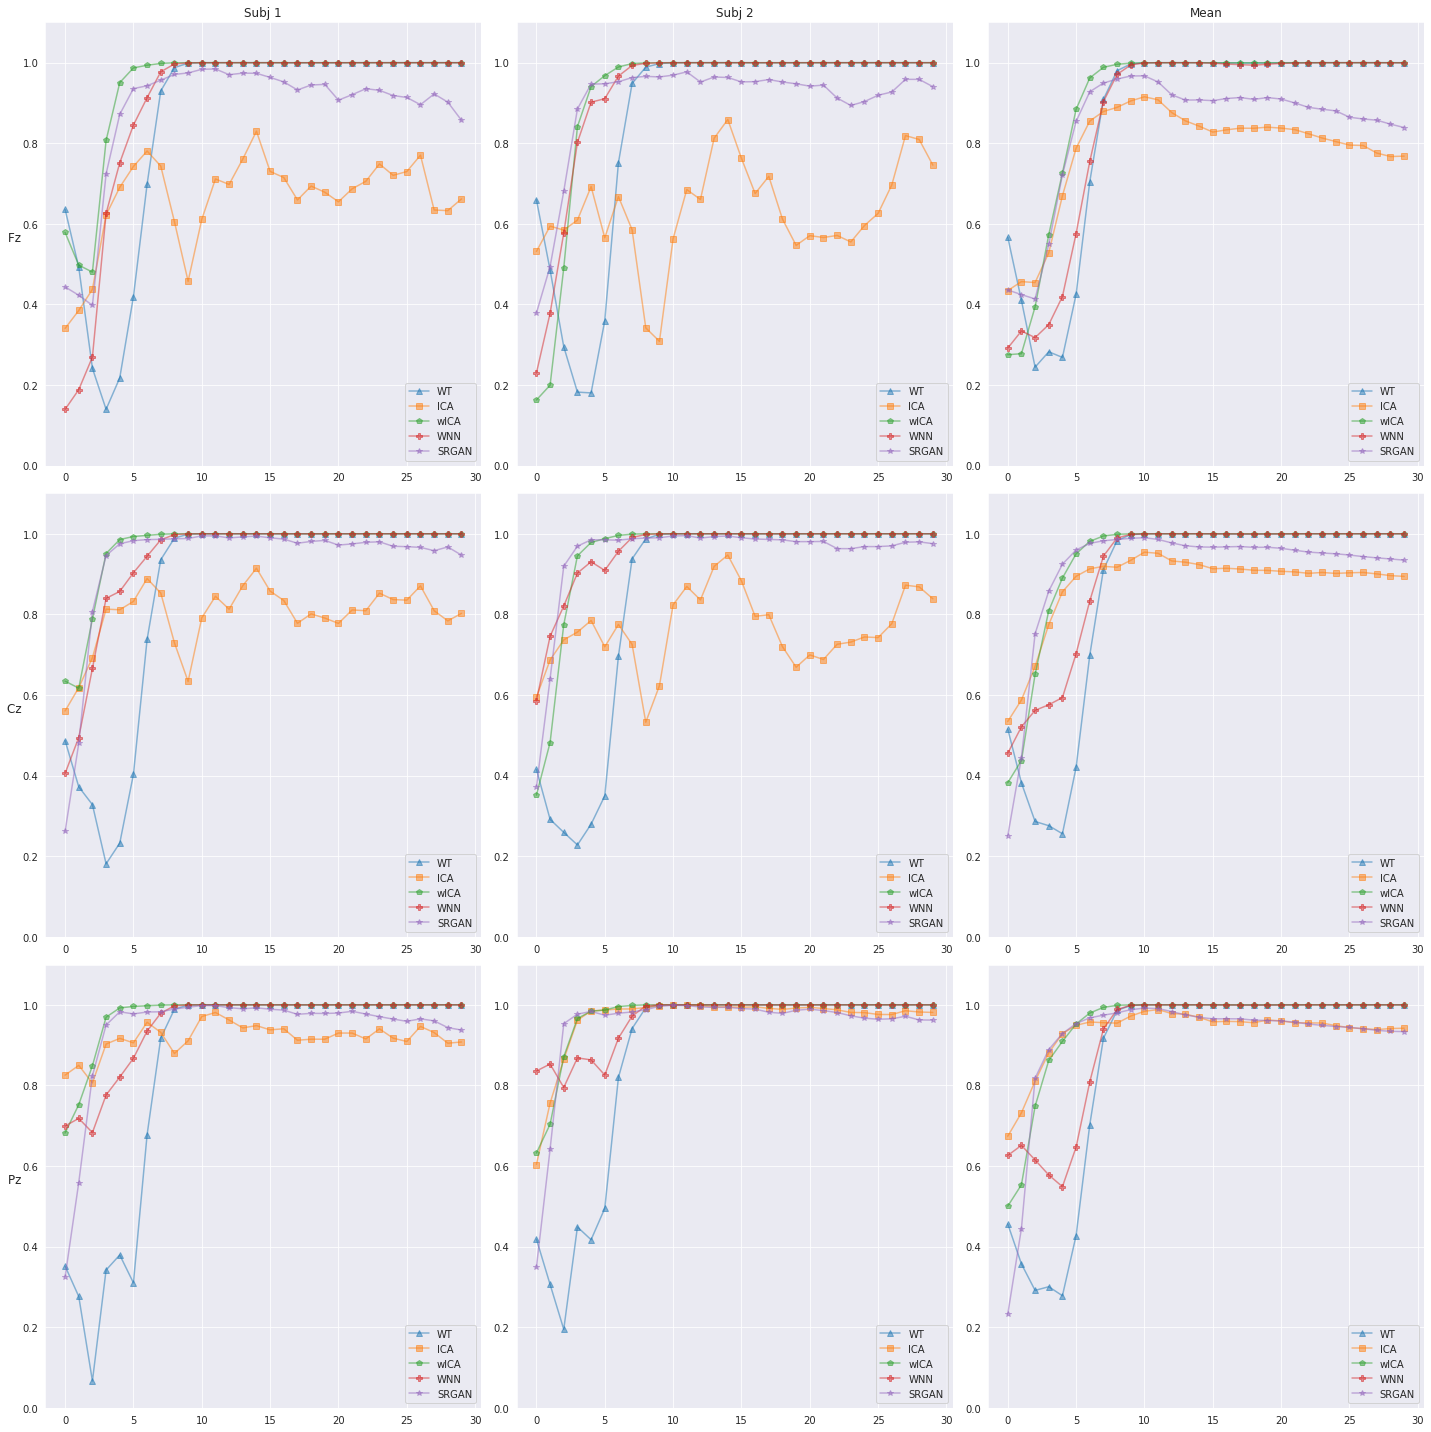

In [ ]:
list_selected_electrodes_indices = [EEG_electrodes.index('Fz'), EEG_electrodes.index('Cz'),
                                    EEG_electrodes.index('Pz')]
list_selected_electrodes = ['Fz', 'Cz', 'Pz']

# Finding average MSC between subjects
avg_cont_denoised_MSC_techniques = np.mean(cont_denoised_MSC_techniques, axis=1)
avg_cont_denoised_MSC_techniques.shape

# Plot MSC
fig, axs = plt.subplots(nrows=int(len(list_selected_electrodes_indices)),
                        ncols=3, figsize=(20,20))

cols = ['Subj {}'.format(col+1) for col in range(2)] + ['Mean']
rows = ['{}  '.format(row) for row in list_selected_electrodes]

for ax, col in zip(axs[0], cols):
    ax.set_title(col)

for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation=0, size='large')
    
for idx_e_ch, e_ch in enumerate(list_selected_electrodes_indices):
    l_freq = 0
    h_freq = 30

    ## Subject 1 
    axs[idx_e_ch,0].plot(
        cont_denoised_MSC_techniques[0,0,e_ch,0,l_freq:h_freq], 
        cont_denoised_MSC_techniques[0,0,e_ch,1,l_freq:h_freq],
        label='WT', marker='^', alpha=0.5)
    axs[idx_e_ch,0].plot(
        cont_denoised_MSC_techniques[1,0,e_ch,0,l_freq:h_freq], 
        cont_denoised_MSC_techniques[1,0,e_ch,1,l_freq:h_freq],
        label='ICA', marker='s', alpha=0.5)
    axs[idx_e_ch,0].plot(
        cont_denoised_MSC_techniques[2,0,e_ch,0,l_freq:h_freq], 
        cont_denoised_MSC_techniques[2,0,e_ch,1,l_freq:h_freq],
        label='wICA', marker='p', alpha=0.5)
    axs[idx_e_ch,0].plot(
        cont_denoised_MSC_techniques[3,0,e_ch,0,l_freq:h_freq], 
        cont_denoised_MSC_techniques[3,0,e_ch,1,l_freq:h_freq],
        label='WNN', marker='P', alpha=0.5)
    axs[idx_e_ch,0].plot(
        cont_denoised_MSC_techniques[4,0,e_ch,0,l_freq:h_freq], 
        cont_denoised_MSC_techniques[4,0,e_ch,1,l_freq:h_freq],
        label='SRGAN', marker='*', alpha=0.5)
    axs[idx_e_ch,0].set_ylim(0,1.1)
    axs[idx_e_ch,0].legend(loc='lower right')

    ## Subject 2
    axs[idx_e_ch,1].plot(
        cont_denoised_MSC_techniques[0,1,e_ch,0,l_freq:h_freq], 
        cont_denoised_MSC_techniques[0,1,e_ch,1,l_freq:h_freq],
        label='WT', marker='^', alpha=0.5)
    axs[idx_e_ch,1].plot(
        cont_denoised_MSC_techniques[1,1,e_ch,0,l_freq:h_freq], 
        cont_denoised_MSC_techniques[1,1,e_ch,1,l_freq:h_freq],
        label='ICA', marker='s', alpha=0.5)
    axs[idx_e_ch,1].plot(
        cont_denoised_MSC_techniques[2,1,e_ch,0,l_freq:h_freq], 
        cont_denoised_MSC_techniques[2,1,e_ch,1,l_freq:h_freq],
        label='wICA', marker='p', alpha=0.5)
    axs[idx_e_ch,1].plot(
        cont_denoised_MSC_techniques[3,1,e_ch,0,l_freq:h_freq], 
        cont_denoised_MSC_techniques[3,1,e_ch,1,l_freq:h_freq],
        label='WNN', marker='P', alpha=0.5)
    axs[idx_e_ch,1].plot(
        cont_denoised_MSC_techniques[4,1,e_ch,0,l_freq:h_freq], 
        cont_denoised_MSC_techniques[4,1,e_ch,1,l_freq:h_freq],
        label='SRGAN', marker='*', alpha=0.5)
    axs[idx_e_ch,1].set_ylim(0,1.1)
    axs[idx_e_ch,1].legend(loc='lower right')

    ## Average of Subjects 
    axs[idx_e_ch,2].plot(
        avg_cont_denoised_MSC_techniques[0,e_ch,0,l_freq:h_freq], 
        avg_cont_denoised_MSC_techniques[0,e_ch,1,l_freq:h_freq],
        label='WT', marker='^', alpha=0.5)
    axs[idx_e_ch,2].plot(
        avg_cont_denoised_MSC_techniques[1,e_ch,0,l_freq:h_freq], 
        avg_cont_denoised_MSC_techniques[1,e_ch,1,l_freq:h_freq],
        label='ICA', marker='s', alpha=0.5)
    axs[idx_e_ch,2].plot(
        avg_cont_denoised_MSC_techniques[2,e_ch,0,l_freq:h_freq], 
        avg_cont_denoised_MSC_techniques[2,e_ch,1,l_freq:h_freq],
        label='wICA', marker='p', alpha=0.5)
    axs[idx_e_ch,2].plot(
        avg_cont_denoised_MSC_techniques[3,e_ch,0,l_freq:h_freq], 
        avg_cont_denoised_MSC_techniques[3,e_ch,1,l_freq:h_freq],
        label='WNN', marker='P', alpha=0.5)
    axs[idx_e_ch,2].plot(
        avg_cont_denoised_MSC_techniques[4,e_ch,0,l_freq:h_freq], 
        avg_cont_denoised_MSC_techniques[4,e_ch,1,l_freq:h_freq],
        label='SRGAN', marker='*', alpha=0.5)
    axs[idx_e_ch,2].set_ylim(0,1.1)
    axs[idx_e_ch,2].legend(loc='lower right')

fig.tight_layout()
plt.show()

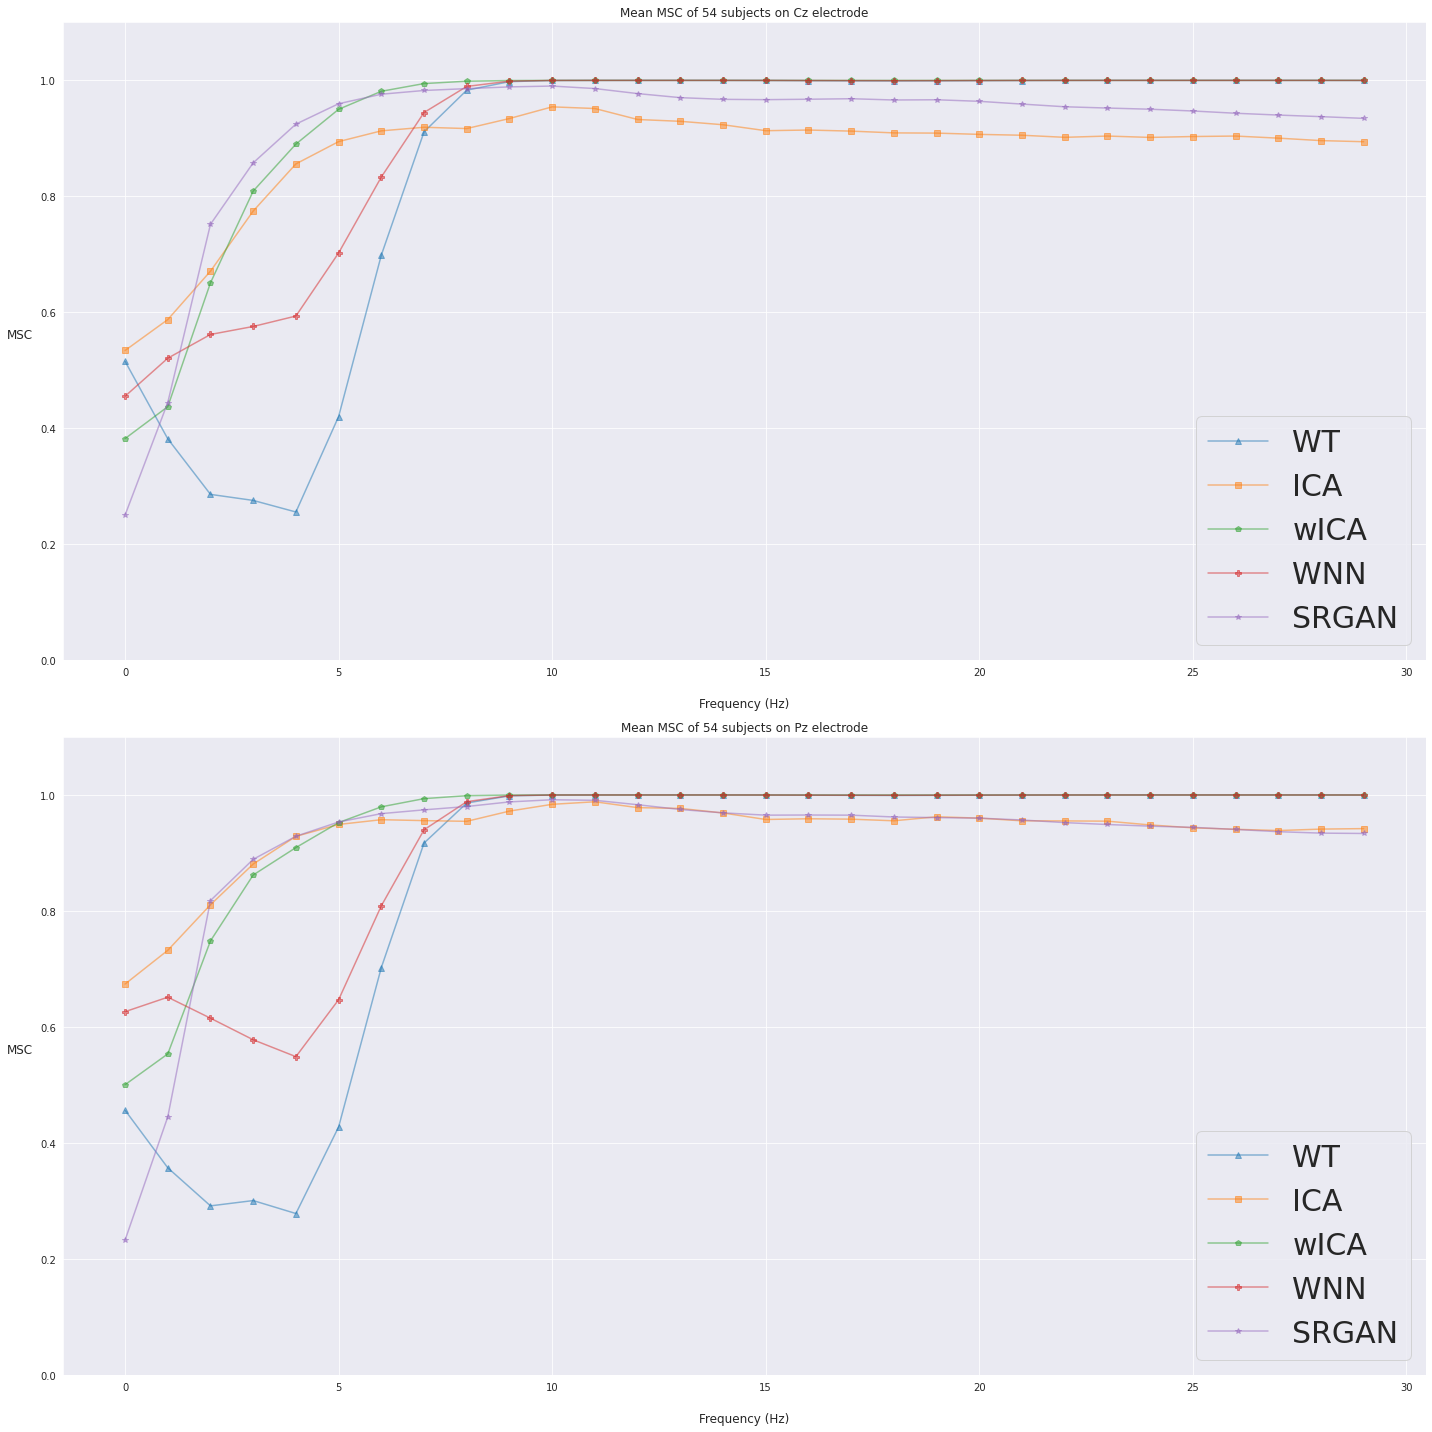

In [ ]:
list_selected_electrodes_indices = [EEG_electrodes.index('Cz'),
                                    EEG_electrodes.index('Pz')]
list_selected_electrodes = ['Cz', 'Pz']

# Finding average MSC between subjects
avg_cont_denoised_MSC_techniques = np.mean(cont_denoised_MSC_techniques, axis=1)
avg_cont_denoised_MSC_techniques.shape

# Plot MSC
fig, axs = plt.subplots(nrows=int(len(list_selected_electrodes_indices)),
                        ncols=1, figsize=(20,20))

# cols = ['Subj {}'.format(col+1) for col in range(2)] + ['Mean']
cols = ['Mean MSC of 54 subjects on Cz electrode', 'Mean MSC of 54 subjects on Pz electrode']
rows = ['{}  '.format(row) for row in list_selected_electrodes]

for ax, col in zip(axs, cols):
    ax.set_title(col)
    ax.set_xlabel("Frequency (Hz)", rotation=0, labelpad=20.0, size='large')
for ax, row in zip(axs, rows):
    ax.set_ylabel("MSC", rotation=0, labelpad=20.0, size='large')
    
for idx_e_ch, e_ch in enumerate(list_selected_electrodes_indices):
    l_freq = 0
    h_freq = 30

    ## Average of Subjects 
    axs[idx_e_ch].plot(
        avg_cont_denoised_MSC_techniques[0,e_ch,0,l_freq:h_freq], 
        avg_cont_denoised_MSC_techniques[0,e_ch,1,l_freq:h_freq],
        label='WT', marker='^', alpha=0.5)
    axs[idx_e_ch].plot(
        avg_cont_denoised_MSC_techniques[1,e_ch,0,l_freq:h_freq], 
        avg_cont_denoised_MSC_techniques[1,e_ch,1,l_freq:h_freq],
        label='ICA', marker='s', alpha=0.5)
    axs[idx_e_ch].plot(
        avg_cont_denoised_MSC_techniques[2,e_ch,0,l_freq:h_freq], 
        avg_cont_denoised_MSC_techniques[2,e_ch,1,l_freq:h_freq],
        label='wICA', marker='p', alpha=0.5)
    axs[idx_e_ch].plot(
        avg_cont_denoised_MSC_techniques[3,e_ch,0,l_freq:h_freq], 
        avg_cont_denoised_MSC_techniques[3,e_ch,1,l_freq:h_freq],
        label='WNN', marker='P', alpha=0.5)
    axs[idx_e_ch].plot(
        avg_cont_denoised_MSC_techniques[4,e_ch,0,l_freq:h_freq], 
        avg_cont_denoised_MSC_techniques[4,e_ch,1,l_freq:h_freq],
        label='SRGAN', marker='*', alpha=0.5)
    axs[idx_e_ch].set_ylim(0,1.1)
    axs[idx_e_ch].legend(loc='lower right', prop={'size':30})

fig.tight_layout()
plt.show()

## PSD

In [ ]:
pure_PSD_techniques = []
cont_PSD_techniques = []
denoised_PSD_techniques = []

for idx_e_technique, e_technique in enumerate(np_data):
    print(ar_techniques[idx_e_technique])
    reconstructed_pure_EEG = np_data[idx_e_technique][0]
    reconstructed_cont_EEG = np_data[idx_e_technique][1]
    reconstructed_denoised_EEG = np_data[idx_e_technique][2]

    pure_PSD_subjs = []
    cont_PSD_subjs = []
    denoised_PSD_subjs = []

    for idx_e_subject in range(number_subjects):
        pure_PSD_CHs = []
        cont_PSD_CHs = []
        denoised_PSD_CHs = []

        manyCH_pureEEG = reconstructed_pure_EEG[idx_e_subject,:,:]
        manyCH_contEEG = reconstructed_cont_EEG[idx_e_subject,:,:]
        manyCH_denoisedEEG = reconstructed_denoised_EEG[idx_e_subject,:,:]
        numbers_EEG_CH = manyCH_denoisedEEG.shape[0]
        
        for idx_channel in range(numbers_EEG_CH):
            oneCH_pure_PSD = calculate_PSD(manyCH_pureEEG[idx_channel], scale='dB')
            oneCH_cont_PSD = calculate_PSD(manyCH_contEEG[idx_channel], scale='dB')
            oneCH_denoised_PSD = calculate_PSD(manyCH_denoisedEEG[idx_channel], scale='dB')

            pure_PSD_CHs.append(oneCH_pure_PSD)
            cont_PSD_CHs.append(oneCH_cont_PSD)
            denoised_PSD_CHs.append(oneCH_denoised_PSD)

        pure_PSD_subjs.append(pure_PSD_CHs)
        cont_PSD_subjs.append(cont_PSD_CHs)
        denoised_PSD_subjs.append(denoised_PSD_CHs)

    pure_PSD_techniques.append(pure_PSD_subjs)
    cont_PSD_techniques.append(cont_PSD_subjs)
    denoised_PSD_techniques.append(denoised_PSD_subjs)

pure_PSD_techniques = np.array(pure_PSD_techniques)
cont_PSD_techniques = np.array(cont_PSD_techniques)
denoised_PSD_techniques = np.array(denoised_PSD_techniques)

print(f'The shape of pure_PSD_techniques: {pure_PSD_techniques.shape}')
print(f'The shape of cont_PSD_techniques: {cont_PSD_techniques.shape}')
print(f'The shape of denoised_PSD_techniques: {denoised_PSD_techniques.shape}')

WT
ICA
wICA
WNN
SRGAN
The shape of pure_PSD_techniques: (5, 54, 19, 2, 101)
The shape of cont_PSD_techniques: (5, 54, 19, 2, 101)
The shape of denoised_PSD_techniques: (5, 54, 19, 2, 101)


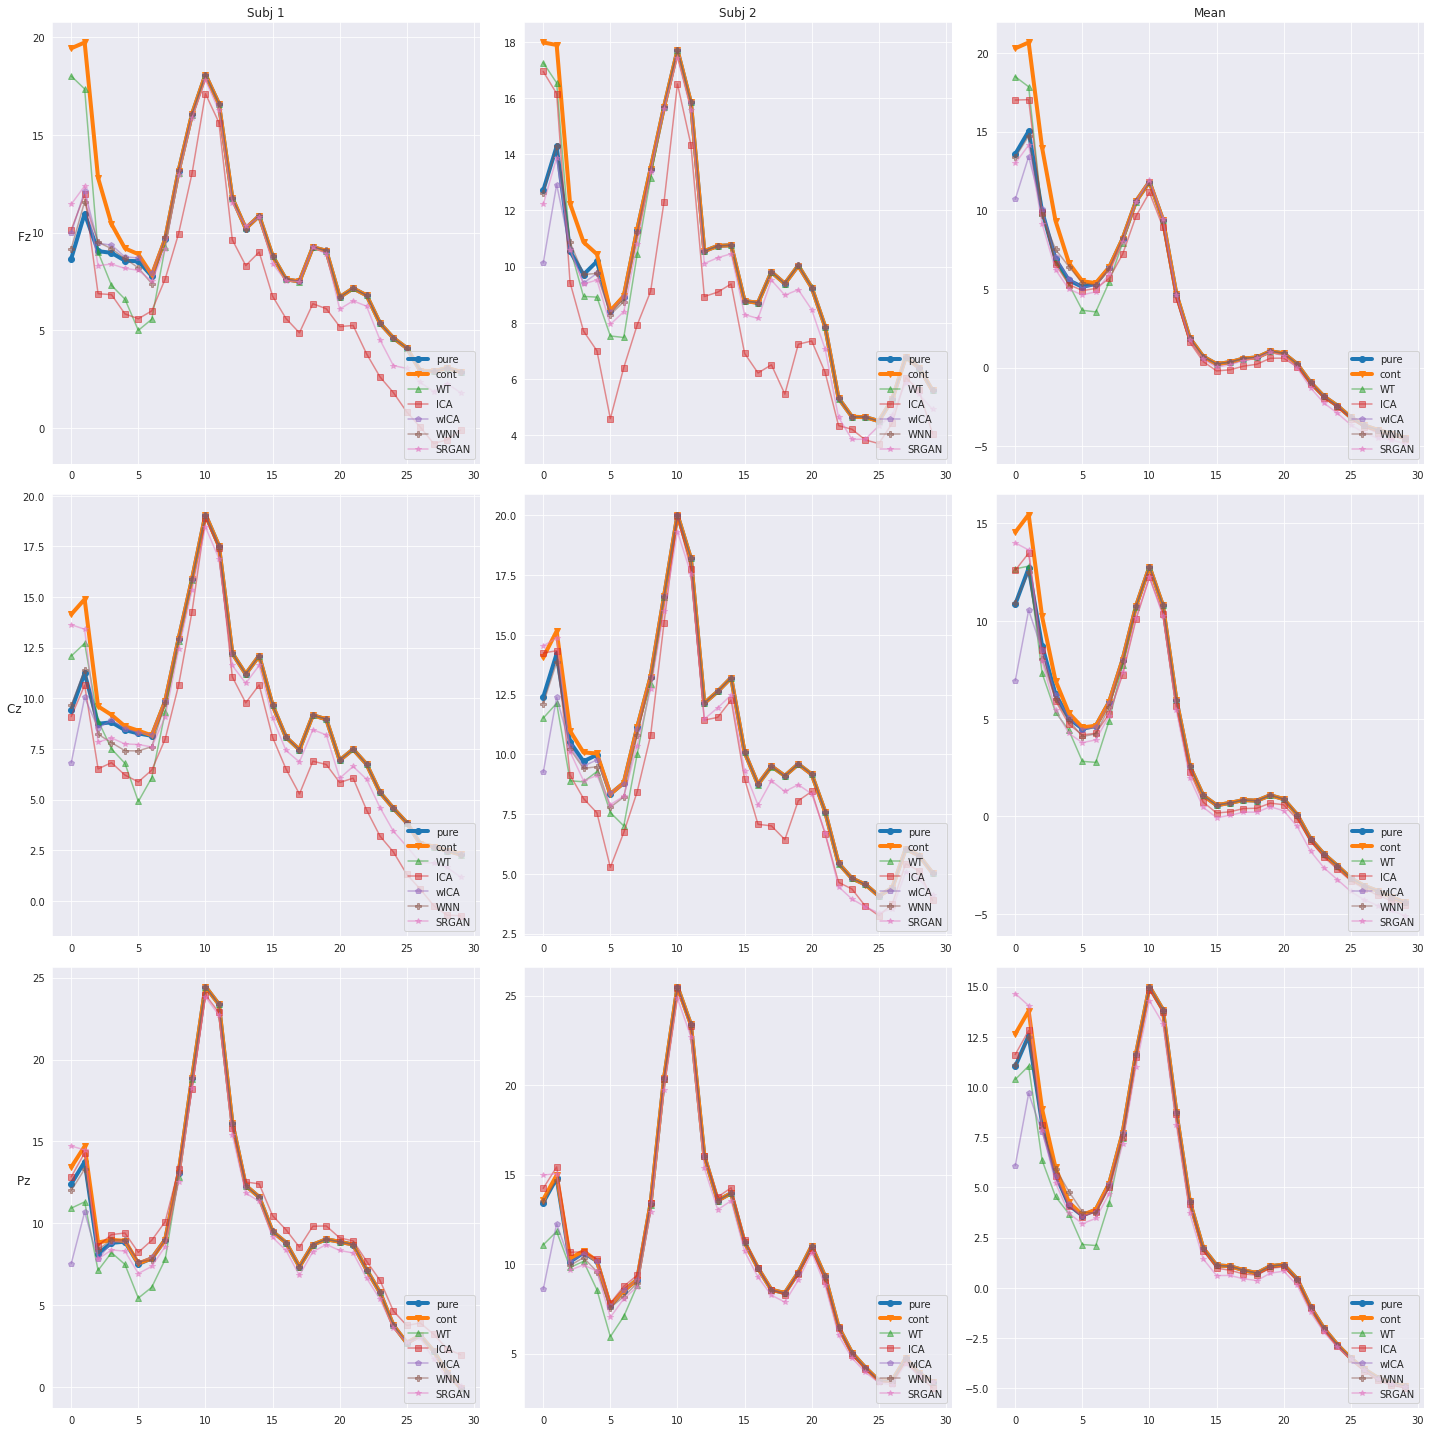

In [ ]:
list_selected_electrodes_indices = [EEG_electrodes.index('Fz'), EEG_electrodes.index('Cz'),
                                    EEG_electrodes.index('Pz')]
list_selected_electrodes = ['Fz', 'Cz', 'Pz']

# Finding average PSD between subjects
avg_pure_PSD_techniques = np.mean(pure_PSD_techniques, axis=1)
avg_cont_PSD_techniques = np.mean(cont_PSD_techniques, axis=1)
avg_denoised_PSD_techniques = np.mean(denoised_PSD_techniques, axis=1)

# Plot PSD
fig, axs = plt.subplots(nrows=int(len(list_selected_electrodes_indices)),
                        ncols=3, figsize=(20,20))

cols = ['Subj {}'.format(col+1) for col in range(2)] + ['Mean']
rows = ['{}  '.format(row) for row in list_selected_electrodes]

for ax, col in zip(axs[0], cols):
    ax.set_title(col)

for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation=0, size='large')
    
for idx_e_ch, e_ch in enumerate(list_selected_electrodes_indices):
    l_freq = 0
    h_freq = 30

    ## Subject 1
    axs[idx_e_ch,0].plot(
        pure_PSD_techniques[0,0,e_ch,0,l_freq:h_freq], 
        pure_PSD_techniques[0,0,e_ch,1,l_freq:h_freq],
        label='pure', marker='o', alpha=1.0, linewidth=4)
    axs[idx_e_ch,0].plot(
        cont_PSD_techniques[0,0,e_ch,0,l_freq:h_freq], 
        cont_PSD_techniques[0,0,e_ch,1,l_freq:h_freq],
        label='cont', marker='v', alpha=1.0, linewidth=4)
    axs[idx_e_ch,0].plot(
        denoised_PSD_techniques[0,0,e_ch,0,l_freq:h_freq], 
        denoised_PSD_techniques[0,0,e_ch,1,l_freq:h_freq],
        label='WT', marker='^', alpha=0.5)
    axs[idx_e_ch,0].plot(
        denoised_PSD_techniques[1,0,e_ch,0,l_freq:h_freq], 
        denoised_PSD_techniques[1,0,e_ch,1,l_freq:h_freq],
        label='ICA', marker='s', alpha=0.5)
    axs[idx_e_ch,0].plot(
        denoised_PSD_techniques[2,0,e_ch,0,l_freq:h_freq], 
        denoised_PSD_techniques[2,0,e_ch,1,l_freq:h_freq],
        label='wICA', marker='p', alpha=0.5)
    axs[idx_e_ch,0].plot(
        denoised_PSD_techniques[3,0,e_ch,0,l_freq:h_freq], 
        denoised_PSD_techniques[3,0,e_ch,1,l_freq:h_freq],
        label='WNN', marker='P', alpha=0.5)
    axs[idx_e_ch,0].plot(
        denoised_PSD_techniques[4,0,e_ch,0,l_freq:h_freq], 
        denoised_PSD_techniques[4,0,e_ch,1,l_freq:h_freq],
        label='SRGAN', marker='*', alpha=0.5)
    # axs[idx_e_ch,0].set_ylim(0,1.1)
    axs[idx_e_ch,0].legend(loc='lower right')

    ## Subject 2
    axs[idx_e_ch,1].plot(
        pure_PSD_techniques[0,1,e_ch,0,l_freq:h_freq], 
        pure_PSD_techniques[0,1,e_ch,1,l_freq:h_freq],
        label='pure', marker='o', alpha=1.0, linewidth=4)
    axs[idx_e_ch,1].plot(
        cont_PSD_techniques[0,1,e_ch,0,l_freq:h_freq], 
        cont_PSD_techniques[0,1,e_ch,1,l_freq:h_freq],
        label='cont', marker='v', alpha=1.0, linewidth=4)
    axs[idx_e_ch,1].plot(
        denoised_PSD_techniques[0,1,e_ch,0,l_freq:h_freq], 
        denoised_PSD_techniques[0,1,e_ch,1,l_freq:h_freq],
        label='WT', marker='^', alpha=0.5)
    axs[idx_e_ch,1].plot(
        denoised_PSD_techniques[1,1,e_ch,0,l_freq:h_freq], 
        denoised_PSD_techniques[1,1,e_ch,1,l_freq:h_freq],
        label='ICA', marker='s', alpha=0.5)
    axs[idx_e_ch,1].plot(
        denoised_PSD_techniques[2,1,e_ch,0,l_freq:h_freq], 
        denoised_PSD_techniques[2,1,e_ch,1,l_freq:h_freq],
        label='wICA', marker='p', alpha=0.5)
    axs[idx_e_ch,1].plot(
        denoised_PSD_techniques[3,1,e_ch,0,l_freq:h_freq], 
        denoised_PSD_techniques[3,1,e_ch,1,l_freq:h_freq],
        label='WNN', marker='P', alpha=0.5)
    axs[idx_e_ch,1].plot(
        denoised_PSD_techniques[4,1,e_ch,0,l_freq:h_freq], 
        denoised_PSD_techniques[4,1,e_ch,1,l_freq:h_freq],
        label='SRGAN', marker='*', alpha=0.5)
    # axs[idx_e_ch,0].set_ylim(0,1.1)
    axs[idx_e_ch,1].legend(loc='lower right')

    ## Average of Subjects 
    axs[idx_e_ch,2].plot(
        avg_pure_PSD_techniques[0,e_ch,0,l_freq:h_freq],
        avg_pure_PSD_techniques[0,e_ch,1,l_freq:h_freq],
        label='pure', marker='o', alpha=1.0, linewidth=4
    )
    axs[idx_e_ch,2].plot(
        avg_cont_PSD_techniques[0,e_ch,0,l_freq:h_freq],
        avg_cont_PSD_techniques[0,e_ch,1,l_freq:h_freq],
        label='cont', marker='v', alpha=1.0, linewidth=4
    )
    axs[idx_e_ch,2].plot(
        avg_denoised_PSD_techniques[0,e_ch,0,l_freq:h_freq], 
        avg_denoised_PSD_techniques[0,e_ch,1,l_freq:h_freq],
        label='WT', marker='^', alpha=0.5)
    axs[idx_e_ch,2].plot(
        avg_denoised_PSD_techniques[1,e_ch,0,l_freq:h_freq], 
        avg_denoised_PSD_techniques[1,e_ch,1,l_freq:h_freq],
        label='ICA', marker='s', alpha=0.5)
    axs[idx_e_ch,2].plot(
        avg_denoised_PSD_techniques[2,e_ch,0,l_freq:h_freq], 
        avg_denoised_PSD_techniques[2,e_ch,1,l_freq:h_freq],
        label='wICA', marker='p', alpha=0.5)
    axs[idx_e_ch,2].plot(
        avg_denoised_PSD_techniques[3,e_ch,0,l_freq:h_freq], 
        avg_denoised_PSD_techniques[3,e_ch,1,l_freq:h_freq],
        label='WNN', marker='P', alpha=0.5)
    axs[idx_e_ch,2].plot(
        avg_denoised_PSD_techniques[4,e_ch,0,l_freq:h_freq], 
        avg_denoised_PSD_techniques[4,e_ch,1,l_freq:h_freq],
        label='SRGAN', marker='*', alpha=0.5)
    # axs[idx_e_ch,2].set_ylim(0,1.1)
    axs[idx_e_ch,2].legend(loc='lower right')


fig.tight_layout()
plt.show()

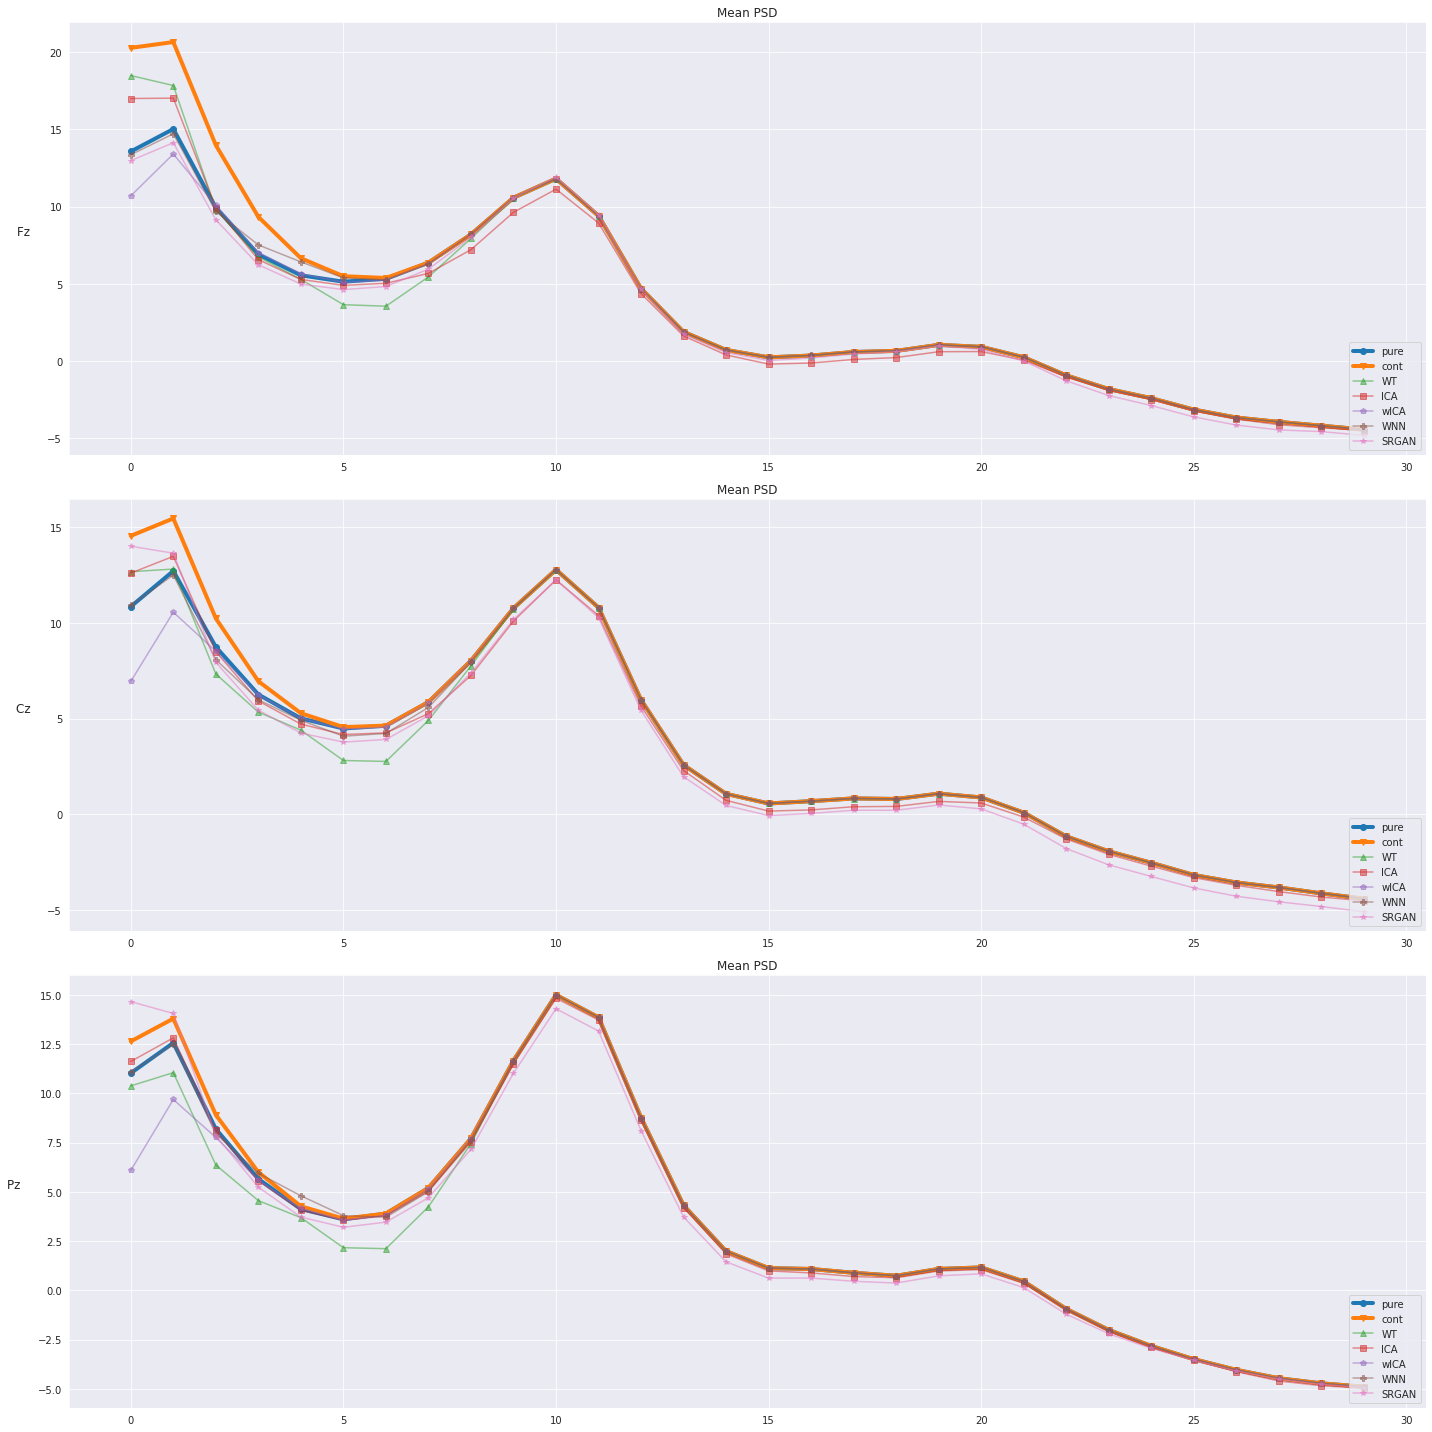

In [ ]:
list_selected_electrodes_indices = [EEG_electrodes.index('Fz'), EEG_electrodes.index('Cz'),
                                    EEG_electrodes.index('Pz')]
list_selected_electrodes = ['Fz', 'Cz', 'Pz']

# Finding average PSD between subjects
avg_pure_PSD_techniques = np.mean(pure_PSD_techniques, axis=1)
avg_cont_PSD_techniques = np.mean(cont_PSD_techniques, axis=1)
avg_denoised_PSD_techniques = np.mean(denoised_PSD_techniques, axis=1)

# Plot PSD
fig, axs = plt.subplots(nrows=int(len(list_selected_electrodes_indices)),
                        ncols=1, figsize=(20,20))

cols = ['Mean PSD'] * len(list_selected_electrodes)
rows = ['{}  '.format(row) for row in list_selected_electrodes]

for ax, col in zip(axs, cols):
    ax.set_title(col)

for ax, row in zip(axs, rows):
    ax.set_ylabel(row, rotation=0, labelpad=20.0, size='large')
    
for idx_e_ch, e_ch in enumerate(list_selected_electrodes_indices):
    l_freq = 0
    h_freq = 30

    ## Average of Subjects 
    axs[idx_e_ch].plot(
        avg_pure_PSD_techniques[0,e_ch,0,l_freq:h_freq],
        avg_pure_PSD_techniques[0,e_ch,1,l_freq:h_freq],
        label='pure', marker='o', alpha=1.0, linewidth=4
    )
    axs[idx_e_ch].plot(
        avg_cont_PSD_techniques[0,e_ch,0,l_freq:h_freq],
        avg_cont_PSD_techniques[0,e_ch,1,l_freq:h_freq],
        label='cont', marker='v', alpha=1.0, linewidth=4
    )
    axs[idx_e_ch].plot(
        avg_denoised_PSD_techniques[0,e_ch,0,l_freq:h_freq], 
        avg_denoised_PSD_techniques[0,e_ch,1,l_freq:h_freq],
        label='WT', marker='^', alpha=0.5)
    axs[idx_e_ch].plot(
        avg_denoised_PSD_techniques[1,e_ch,0,l_freq:h_freq], 
        avg_denoised_PSD_techniques[1,e_ch,1,l_freq:h_freq],
        label='ICA', marker='s', alpha=0.5)
    axs[idx_e_ch].plot(
        avg_denoised_PSD_techniques[2,e_ch,0,l_freq:h_freq], 
        avg_denoised_PSD_techniques[2,e_ch,1,l_freq:h_freq],
        label='wICA', marker='p', alpha=0.5)
    axs[idx_e_ch].plot(
        avg_denoised_PSD_techniques[3,e_ch,0,l_freq:h_freq], 
        avg_denoised_PSD_techniques[3,e_ch,1,l_freq:h_freq],
        label='WNN', marker='P', alpha=0.5)
    axs[idx_e_ch].plot(
        avg_denoised_PSD_techniques[4,e_ch,0,l_freq:h_freq], 
        avg_denoised_PSD_techniques[4,e_ch,1,l_freq:h_freq],
        label='SRGAN', marker='*', alpha=0.5)
    # axs[idx_e_ch,2].set_ylim(0,1.1)
    axs[idx_e_ch].legend(loc='lower right')


fig.tight_layout()
plt.show()

## SNR

In [ ]:
# Finding average PSD between subjects
avg_pure_PSD_techniques = np.mean(pure_PSD_techniques, axis=1)
avg_cont_PSD_techniques = np.mean(cont_PSD_techniques, axis=1)
avg_denoised_PSD_techniques = np.mean(denoised_PSD_techniques, axis=1)

## CC
- Correlation Coefficient

In [ ]:
df_CC_techniques = []

for idx_e_technique, e_technique in enumerate(np_data):
    print(ar_techniques[idx_e_technique])
    reconstructed_pure_EEG = np_data[idx_e_technique][0]
    reconstructed_cont_EEG = np_data[idx_e_technique][1]
    reconstructed_denoised_EEG = np_data[idx_e_technique][2]

    cont_denoised_CC_subjs = {}

    for idx_e_subject in range(number_subjects):
        manyCH_CC = []
        manyCH_contEEG = reconstructed_cont_EEG[idx_e_subject,:,:]
        manyCH_denoisedEEG = reconstructed_denoised_EEG[idx_e_subject,:,:]
        numbers_EEG_CH = manyCH_denoisedEEG.shape[0]
        
        for idx_channel in range(numbers_EEG_CH):
            oneCH_CC = calculate_CC(
                cont_EEG_e_CH=manyCH_contEEG[idx_channel], 
                denoised_EEG_e_CH=manyCH_denoisedEEG[idx_channel])[0]
            
            manyCH_CC.append(oneCH_CC)

        cont_denoised_CC_subjs[list_denoised_EEG_keys[idx_e_subject]] = manyCH_CC
        
    # Create DataFrame for CC
    df_CC = pd.DataFrame(data=cont_denoised_CC_subjs, 
                        index= EEG_electrodes,
                        columns=cont_denoised_CC_subjs.keys())

    print(f"Avg. CC of each Electrodes: \n{df_CC.mean(axis=1)}")
    print(f"Grand Avg. CC: {np.mean(df_CC.mean(axis=1))}")
    print('='*150)
    # Append
    df_CC_techniques.append(df_CC)

    # break

WT
Avg. CC of each Electrodes: 
Fp1    0.684970
Fp2    0.690721
F3     0.758470
F4     0.764284
C3     0.831403
C4     0.827179
P3     0.870462
P4     0.875475
O1     0.879131
O2     0.882318
F7     0.806092
F8     0.793234
T3     0.849229
T4     0.850000
T5     0.868480
T6     0.871678
Fz     0.765202
Cz     0.832351
Pz     0.875365
dtype: float64
Grand Avg. CC: 0.8197917636766704
ICA
Avg. CC of each Electrodes: 
Fp1    0.501164
Fp2    0.527725
F3     0.663109
F4     0.686697
C3     0.846926
C4     0.866632
P3     0.937231
P4     0.955230
O1     0.968525
O2     0.973855
F7     0.783973
F8     0.810959
T3     0.905816
T4     0.925122
T5     0.929867
T6     0.954518
Fz     0.736875
Cz     0.865809
Pz     0.947443
dtype: float64
Grand Avg. CC: 0.8309196438178161
wICA
Avg. CC of each Electrodes: 
Fp1    0.466358
Fp2    0.462087
F3     0.692752
F4     0.682998
C3     0.852623
C4     0.839673
P3     0.911428
P4     0.905846
O1     0.925490
O2     0.911940
F7     0.606218
F8     0.588858
T3 